# Introduction to Categorical Data Encoding

Categorical data encoding is a crucial step in the data preprocessing pipeline, particularly when preparing data for machine learning models. Categorical data refers to variables that contain label values rather than numeric values. Common examples include gender, nationality, and color. Since most machine learning algorithms require numerical input, encoding categorical data is essential.

In this guide, we will explore two popular techniques for encoding categorical data: **One-Hot Encoding** and **Label Encoding**. We will provide examples of each method and demonstrate their effects through visualizations.

- **Label Encoding**: This method converts categorical labels into numeric values. Each unique category is assigned an integer value. While simple, this approach can introduce ordinal relationships where none exist, potentially impacting model performance.

- **One-Hot Encoding**: This technique creates binary columns for each category. Each column corresponds to a unique category, and a value of 1 or 0 indicates the presence or absence of that category. One-hot encoding prevents ordinal relationships but can lead to a high-dimensional feature space, especially with many unique categories.

Understanding and choosing the right encoding method is vital for ensuring that machine learning models interpret categorical data correctly and perform optimally.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [2]:

# Sample data
data = {
    'Color': ['Red', 'Blue', 'Green', 'Blue', 'Red', 'Green', 'Green', 'Blue', 'Red', 'Red'],
    'Size': ['S', 'M', 'L', 'L', 'M', 'S', 'S', 'M', 'L', 'M'],
    'Price': [10, 15, 20, 10, 15, 20, 15, 10, 20, 10]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the original data
print("Original Data:")
print(df)

Original Data:
   Color Size  Price
0    Red    S     10
1   Blue    M     15
2  Green    L     20
3   Blue    L     10
4    Red    M     15
5  Green    S     20
6  Green    S     15
7   Blue    M     10
8    Red    L     20
9    Red    M     10


<hr>

## Label Encoding

In [3]:
# Label Encoding
label_encoder = LabelEncoder()
df['Color_Label'] = label_encoder.fit_transform(df['Color'])
df['Size_Label'] = label_encoder.fit_transform(df['Size'])
print(df)

   Color Size  Price  Color_Label  Size_Label
0    Red    S     10            2           2
1   Blue    M     15            0           1
2  Green    L     20            1           0
3   Blue    L     10            0           0
4    Red    M     15            2           1
5  Green    S     20            1           2
6  Green    S     15            1           2
7   Blue    M     10            0           1
8    Red    L     20            2           0
9    Red    M     10            2           1


In [4]:
print("Label Encoding : \n\tColor")
for x,y in zip(df['Color'],df['Color_Label']):
    print(f'\t {x} \t-  {y}')

print("\n\n\tSize")
for x,y in zip(df['Size'],df['Size_Label']):
    print(f'\t {x} \t-  {y}')

Label Encoding : 
	Color
	 Red 	-  2
	 Blue 	-  0
	 Green 	-  1
	 Blue 	-  0
	 Red 	-  2
	 Green 	-  1
	 Green 	-  1
	 Blue 	-  0
	 Red 	-  2
	 Red 	-  2


	Size
	 S 	-  2
	 M 	-  1
	 L 	-  0
	 L 	-  0
	 M 	-  1
	 S 	-  2
	 S 	-  2
	 M 	-  1
	 L 	-  0
	 M 	-  1


<hr>

## One Hot Encoding

In [5]:
# One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False)
color_encoded = one_hot_encoder.fit_transform(df[['Color']])
size_encoded = one_hot_encoder.fit_transform(df[['Size']])

In [6]:
print(color_encoded)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [7]:
# Convert the arrays to DataFrames
one_hot_encoder.fit(df[['Color']])
color_encoded_df = pd.DataFrame(color_encoded, columns=[f'Color_{category}' for category in label_encoder.classes_])
one_hot_encoder.fit(df[['Size']])
size_encoded_df = pd.DataFrame(size_encoded, columns=[f'Size_{category}' for category in label_encoder.classes_])

In [8]:
print(color_encoded_df)

   Color_L  Color_M  Color_S
0      0.0      0.0      1.0
1      1.0      0.0      0.0
2      0.0      1.0      0.0
3      1.0      0.0      0.0
4      0.0      0.0      1.0
5      0.0      1.0      0.0
6      0.0      1.0      0.0
7      1.0      0.0      0.0
8      0.0      0.0      1.0
9      0.0      0.0      1.0


In [9]:
# Concatenate the original DataFrame with the new one-hot encoded DataFrames
df_one_hot = pd.concat([df, color_encoded_df, size_encoded_df], axis=1)

<hr>

## Visualization

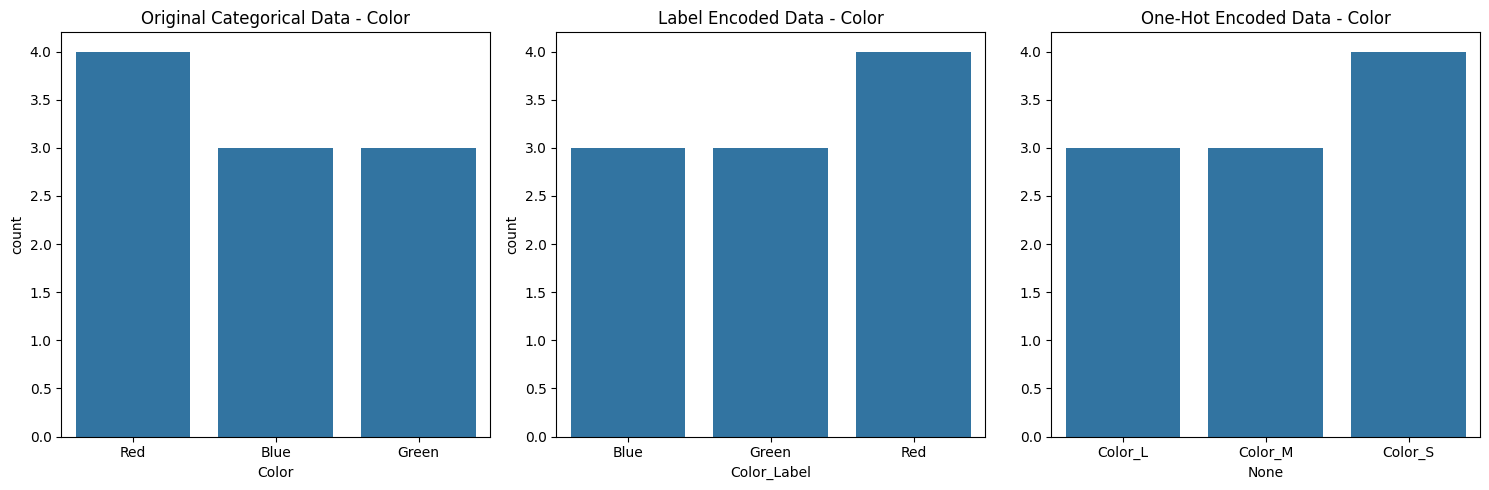

In [10]:
# Visualize the effect of encoding
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Original data visualization
sns.countplot(data=df, x='Color', ax=ax[0])
ax[0].set_title('Original Categorical Data - Color')



label_encoder.fit(df['Color'])
# Label encoded data visualization
sns.countplot(data=df, x='Color_Label', ax=ax[1])
ax[1].set_title('Label Encoded Data - Color')
ax[1].set_xticks(range(len(label_encoder.classes_)))
ax[1].set_xticklabels(label_encoder.classes_)

# One-hot encoded data visualization
color_sum = color_encoded_df.sum()
sns.barplot(x=color_sum.index, y=color_sum.values, ax=ax[2])
ax[2].set_title('One-Hot Encoded Data - Color')

plt.tight_layout()
plt.show()

In [11]:
print("Data with Label Encoding:")
print(df[['Color', 'Color_Label', 'Size', 'Size_Label']])

print("\nData with One-Hot Encoding:")
print(df_one_hot[['Color', 'Size'] + color_encoded_df.columns.tolist() + size_encoded_df.columns.tolist()])

Data with Label Encoding:
   Color  Color_Label Size  Size_Label
0    Red            2    S           2
1   Blue            0    M           1
2  Green            1    L           0
3   Blue            0    L           0
4    Red            2    M           1
5  Green            1    S           2
6  Green            1    S           2
7   Blue            0    M           1
8    Red            2    L           0
9    Red            2    M           1

Data with One-Hot Encoding:
   Color Size  Color_L  Color_M  Color_S  Size_L  Size_M  Size_S
0    Red    S      0.0      0.0      1.0     0.0     0.0     1.0
1   Blue    M      1.0      0.0      0.0     0.0     1.0     0.0
2  Green    L      0.0      1.0      0.0     1.0     0.0     0.0
3   Blue    L      1.0      0.0      0.0     1.0     0.0     0.0
4    Red    M      0.0      0.0      1.0     0.0     1.0     0.0
5  Green    S      0.0      1.0      0.0     0.0     0.0     1.0
6  Green    S      0.0      1.0      0.0     0.0     0.0     

## Conclusion

Categorical data encoding is an essential step in the data preprocessing workflow for machine learning. The two primary techniques, **Label Encoding** and **One-Hot Encoding**, offer different advantages and challenges.

- **Label Encoding** is straightforward and space-efficient but may inadvertently introduce ordinal relationships among categories, which can mislead certain algorithms.
- **One-Hot Encoding** avoids these ordinal relationships by representing each category with binary columns, though it can lead to high-dimensional feature spaces.

Selecting the appropriate encoding method depends on the specific characteristics of the dataset and the requirements of the machine learning model being used. For models that assume or can handle ordinal relationships, label encoding might be sufficient. However, for most other scenarios, especially where categories are non-ordinal, one-hot encoding is preferred.

By understanding and applying these encoding techniques effectively, you can improve the performance and accuracy of your machine learning models. The visualizations and examples provided in this guide should help clarify the impact of each method and guide you in making informed decisions when preprocessing categorical data.
